In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
p = Path('~/Documents/data/ga/politics/maps/columbia-county/county-districts/county-districts.geojson').expanduser()
columbia_county = gpd.read_file(p)


<AxesSubplot:>

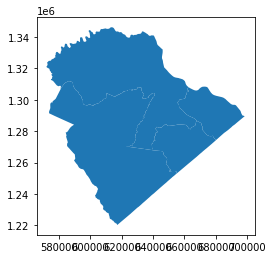

In [11]:
columbia_county.plot(aspect=1)

In [12]:
columbia_county.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
p = Path('~/Documents/data/ga/politics/maps/columbia-county/CountyDistricts/CountyDistricts.shp').expanduser()
columbia_county = gpd.read_file(p)

<AxesSubplot:>

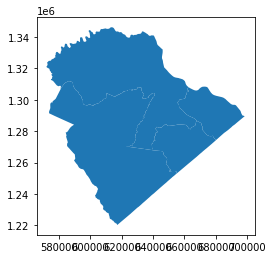

In [14]:
columbia_county.plot()

In [15]:
columbia_county.crs

<Derived Projected CRS: PROJCS["NAD83 / Georgia East (ftUS)",GEOGCS["NAD83 ...>
Name: NAD83 / Georgia East (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [39]:
x = columbia_county.to_crs(epsg=4326)

<AxesSubplot:>

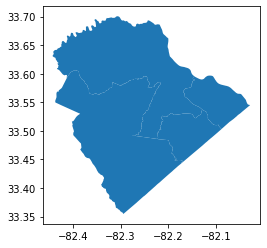

In [40]:
x.plot()

In [27]:
import contextily as cx

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x1cea81180>

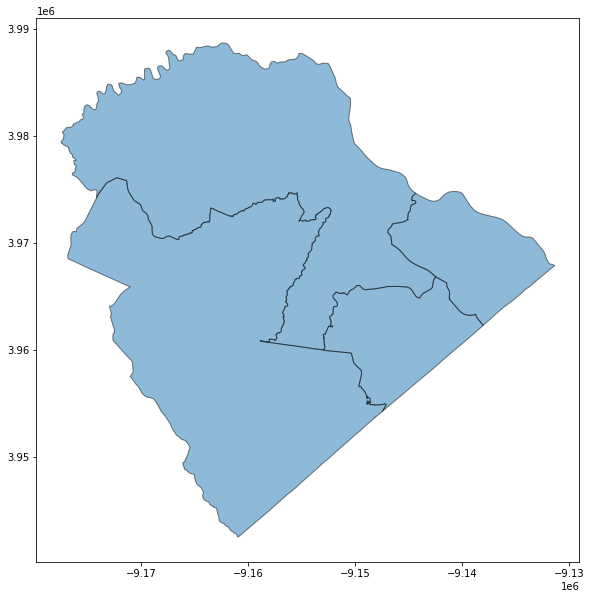

In [37]:
ax = x.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=14)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=10)

In [42]:
import folium


m = folium.Map(location=[33.55, -82.3])
folium.GeoJson(x, name="districts").add_to(m)
m

In [43]:
p = Path('~/Documents/data/ga/politics/maps/vtd/VTDlatest-Shapefile/VTD2020-Shapefile.shp').expanduser()
precincts = gpd.read_file(p)

In [44]:
x = precincts.to_crs(epsg=4326)

In [ ]:
m = folium.Map(location=[33.55, -82.3])
folium.GeoJson(x, name="precincts").add_to(m)
m

In [46]:
m.save("index.html")

In [47]:
x.columns

Index(['ID', 'AREA', 'DATA', 'DISTRICT', 'CTYSOSID', 'PRECINCT_I',
       'PRECINCT_N', 'CNTY', 'FIPS2', 'CTYNAME',
       ...
       'UKNMALEREG', 'UKNMALEVOT', 'UNKMALEVOT', 'UKNFMREG20', 'UKNFMVOTED',
       'UKNFMVOTE1', 'UKNOWNREG2', 'UKNOWNVOTE', 'UKNOWVOTED', 'geometry'],
      dtype='object', length=116)

In [56]:
style_function = lambda _: {
        "color": 'red',
        "weight": 1,
        "fillColor" : 'blue',

    }

fulton_precincts = x[x.CTYNAME=='COLUMBIA']
m = folium.Map(location=[33.55, -82.3])
folium.GeoJson(fulton_precincts, name="fulton_precincts", style_function=style_function).add_to(m)
m